<a href="https://colab.research.google.com/github/Reconocimiento-de-patrones-UNQ/Collabs/blob/main/Modelos_Lineales2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Modelos Lineales
#### Referencia: Cap 4 -  Hands‑on Machine Learning with Scikit‑Learn, Keras & TensorFlow – Concepts, Tools, and Techniques to Build Intelligent Systems

Los Modelos Lineales nos permiten usar datos discretos, como si a alguien
le gusta o no la película ver a su equipo de futbol, para predecir algo continuo, como cuántos gramos de mani come cada día.

---
## Regresión Lineal
Este modelo ajusta una recta a los datos de forma tal que se minimize la Suma de Residuos Cuadrados (SSR) y cuando ajustamos la recta a los datos, podemos calcular fácilmente el R2, que nos da una idea de la precisión de las predicciones y la Regresión Lineal nos proporciona un p-value para el R2, por lo que podemos tener una idea de qué tanta confianza debemos tener en que las predicciones hechas con la recta ajustada son mejores que las predicciones hechas con la media de los valores de los datos.
###Ecuacion modelo para regresión lineal:
  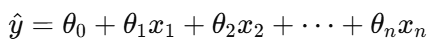


Simplificando la ecuacion, llegamos a la ecuacion normal donde

image.png


Visualización de Datos

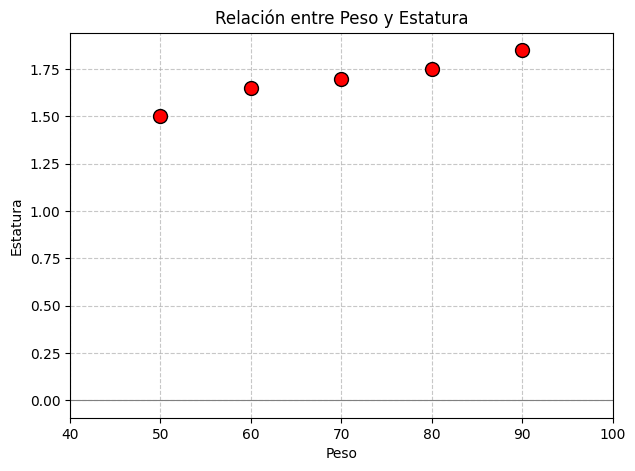

El Problema: Hemos recolectado mediciones de Peso y Estatura de varias personas y queremos usar el Peso para predecir la Estatura, que es una variable continua.
Este gráfico muestra la dispersión de los datos. El objetivo de la regresión lineal es encontrar una relación que nos permita hacer predicciones precisas.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Datos de ejemplo (simulados para fines ilustrativos)
peso = np.array([50, 60, 70, 80, 90])
estatura = np.array([1.50, 1.65, 1.70, 1.75, 1.85])

# Crear el gráfico de dispersión
plt.figure(figsize=(7, 5))
plt.scatter(peso, estatura, color='red', s=100, edgecolors='black', zorder=2) # Puntos con borde negro
plt.xlabel("Peso")
plt.ylabel("Estatura")
plt.title("Relación entre Peso y Estatura")
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8) # Eje Y
plt.axvline(0, color='gray', linewidth=0.8) # Eje X
plt.xlim(40, 100)

plt.show()

print("El Problema: Hemos recolectado mediciones de Peso y Estatura de varias personas y queremos usar el Peso para predecir la Estatura, que es una variable continua.")
print("Este gráfico muestra la dispersión de los datos. El objetivo de la regresión lineal es encontrar una relación que nos permita hacer predicciones precisas.")


En este primer ejemplo, simulamos datos de peso y estatura para ilustrar el problema fundamental de la regresión lineal. Queremos entender si existe una relación entre el peso de una persona y su estatura, y si podemos usar el peso para predecir la estatura. El gráfico de dispersión muestra cada punto de datos, donde cada punto representa el peso y la estatura de una persona. Observamos cómo se distribuyen estos puntos, pero aún no hemos aplicado ningún modelo. Este es el punto de partida antes de intentar ajustar una línea a los datos.

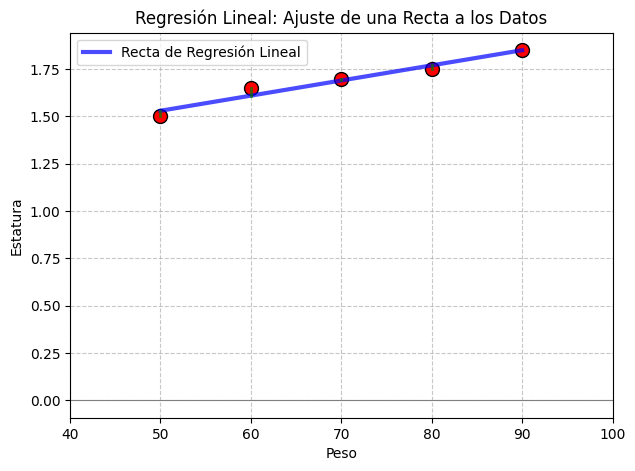

Una Solución: La Regresión Lineal ajusta una recta a los datos que minimiza la Suma de Residuos Cuadrados (SSR).
Los residuos (líneas verdes) son las diferencias verticales entre la estatura observada y la estatura predicha por la recta. El objetivo es que estos residuos sean lo más pequeños posible.
Coeficiente de la recta (pendiente): 0.01
Ordenada al origen: 1.13


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Datos de ejemplo
peso = np.array([50, 60, 70, 80, 90]).reshape(-1, 1) # reshape para scikit-learn
estatura = np.array([1.50, 1.65, 1.70, 1.75, 1.85])

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(peso, estatura)
# Realizar predicciones
estatura_predicha = model.predict(peso)

# Calcular residuos
residuos = estatura - estatura_predicha

# Crear el gráfico
plt.figure(figsize=(7, 5))
plt.scatter(peso, estatura, color='red', s=100, edgecolors='black', zorder=2) # Puntos observados
plt.plot(peso, estatura_predicha, color='blue', linewidth=3, label='Recta de Regresión Lineal', alpha=0.7) # Recta ajustada

# Dibujar los residuos
for i in range(len(peso)):
    plt.plot([peso[i], peso[i]], [estatura[i], estatura_predicha[i]], color='green', linestyle='-', linewidth=2, alpha=0.7)

plt.xlabel("Peso")
plt.ylabel("Estatura")
plt.title("Regresión Lineal: Ajuste de una Recta a los Datos")
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8) # Eje Y
plt.axvline(0, color='gray', linewidth=0.8) # Eje X
plt.xlim(40, 100)
plt.legend()
plt.show()

print("Una Solución: La Regresión Lineal ajusta una recta a los datos que minimiza la Suma de Residuos Cuadrados (SSR).")
print("Los residuos (líneas verdes) son las diferencias verticales entre la estatura observada y la estatura predicha por la recta. El objetivo es que estos residuos sean lo más pequeños posible.")
print(f"Coeficiente de la recta (pendiente): {model.coef_[0]:.2f}")
print(f"Ordenada al origen: {model.intercept_:.2f}")

Aquí aplicamos la regresión lineal a nuestros datos de peso y estatura. La 'recta de regresión' (línea azul) es el resultado de este proceso. Esta recta se elige de tal manera que minimiza la 'Suma de Residuos Cuadrados' (SSR). Los 'residuos' (líneas verdes) son las distancias verticales desde cada punto de datos real hasta la recta de regresión. Cuanto menores sean estos residuos, mejor se ajusta la recta a los datos, lo que significa que nuestras predicciones serán más precisas.

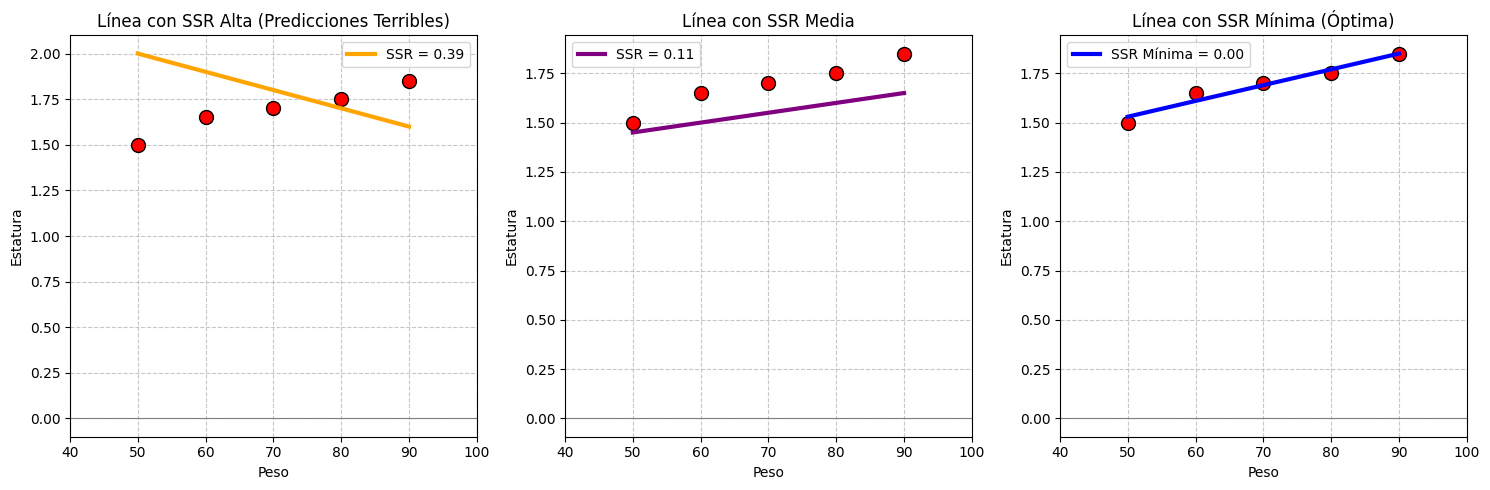

La Regresión Lineal selecciona la recta (la pendiente y el intercepto con el eje y) que da como resultado la SSR mínima.
Como se observa en los gráficos, diferentes líneas de ajuste resultan en diferentes valores de SSR. La línea azul en el tercer gráfico es la que minimiza la SSR, lo que la convierte en el mejor ajuste lineal para nuestros datos.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # Para SSR

# Datos de ejemplo
peso = np.array([50, 60, 70, 80, 90]).reshape(-1, 1)
estatura = np.array([1.50, 1.65, 1.70, 1.75, 1.85])

# Crear y entrenar el modelo de regresión lineal (para la línea óptima)
model_optimal = LinearRegression()
model_optimal.fit(peso, estatura)
estatura_predicha_optimal = model_optimal.predict(peso)
ssr_optimal = np.sum((estatura - estatura_predicha_optimal)**2)

# Definir algunas líneas de ejemplo con diferentes pendientes y ordenadas
# Linea 1: Mala predicción
slope1 = 0.001
intercept1 = 1.0
estatura_predicha1 = peso.flatten() * slope1 + intercept1
ssr1 = np.sum((estatura - estatura_predicha1)**2)

# Linea 2: Un poco mejor
slope2 = 0.005
intercept2 = 1.2
estatura_predicha2 = peso.flatten() * slope2 + intercept2
ssr2 = np.sum((estatura - estatura_predicha2)**2)

# Linea 3: Muy mala (pendiente negativa)
slope3 = -0.01
intercept3 = 2.5
estatura_predicha3 = peso.flatten() * slope3 + intercept3
ssr3 = np.sum((estatura - estatura_predicha3)**2)


# Graficar
plt.figure(figsize=(15, 5))

# Gráfico 1: Línea con SSR alta (mala)
plt.subplot(1, 3, 1)
plt.scatter(peso, estatura, color='red', s=100, edgecolors='black', zorder=2)
plt.plot(peso, estatura_predicha3, color='orange', linewidth=3, label=f'SSR = {ssr3:.2f}')
plt.xlabel("Peso")
plt.ylabel("Estatura")
plt.title("Línea con SSR Alta (Predicciones Terribles)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8) # Eje Y
plt.axvline(0, color='gray', linewidth=0.8) # Eje X
plt.xlim(40, 100)

# Gráfico 2: Línea con SSR media
plt.subplot(1, 3, 2)
plt.scatter(peso, estatura, color='red', s=100, edgecolors='black', zorder=2)
plt.plot(peso, estatura_predicha2, color='purple', linewidth=3, label=f'SSR = {ssr2:.2f}')
plt.xlabel("Peso")
plt.ylabel("Estatura")
plt.title("Línea con SSR Media")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8) # Eje Y
plt.axvline(0, color='gray', linewidth=0.8) # Eje X
plt.xlim(40, 100)

# Gráfico 3: Línea con SSR mínima (óptima)
plt.subplot(1, 3, 3)
plt.scatter(peso, estatura, color='red', s=100, edgecolors='black', zorder=2)
plt.plot(peso, estatura_predicha_optimal, color='blue', linewidth=3, label=f'SSR Mínima = {ssr_optimal:.2f}')
plt.xlabel("Peso")
plt.ylabel("Estatura")
plt.title("Línea con SSR Mínima (Óptima)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8) # Eje Y
plt.axvline(0, color='gray', linewidth=0.8) # Eje X
plt.xlim(40, 100)
plt.tight_layout()
plt.show()

print("La Regresión Lineal selecciona la recta (la pendiente y el intercepto con el eje y) que da como resultado la SSR mínima.")
print("Como se observa en los gráficos, diferentes líneas de ajuste resultan en diferentes valores de SSR. La línea azul en el tercer gráfico es la que minimiza la SSR, lo que la convierte en el mejor ajuste lineal para nuestros datos.")


La clave de la regresión lineal es encontrar la línea que 'mejor se ajusta' a los datos. Para cuantificar qué tan bien se ajusta una línea, utilizamos la 'Suma de Residuos Cuadrados' (SSR). Los residuos son las distancias de cada punto a la línea. Al elevar al cuadrado estas distancias y sumarlas, obtenemos una medida del error total del modelo.

En estos gráficos, podemos ver cómo diferentes líneas (con diferentes pendientes e interceptos) producen diferentes valores de SSR. Una SSR grande indica un mal ajuste (como en el primer gráfico con la línea naranja), mientras que una SSR pequeña indica un mejor ajuste. La regresión lineal encuentra la línea (línea azul en el tercer gráfico) que tiene la SSR más baja posible, minimizando así el error de predicción.

## R-cuadrado y p-value

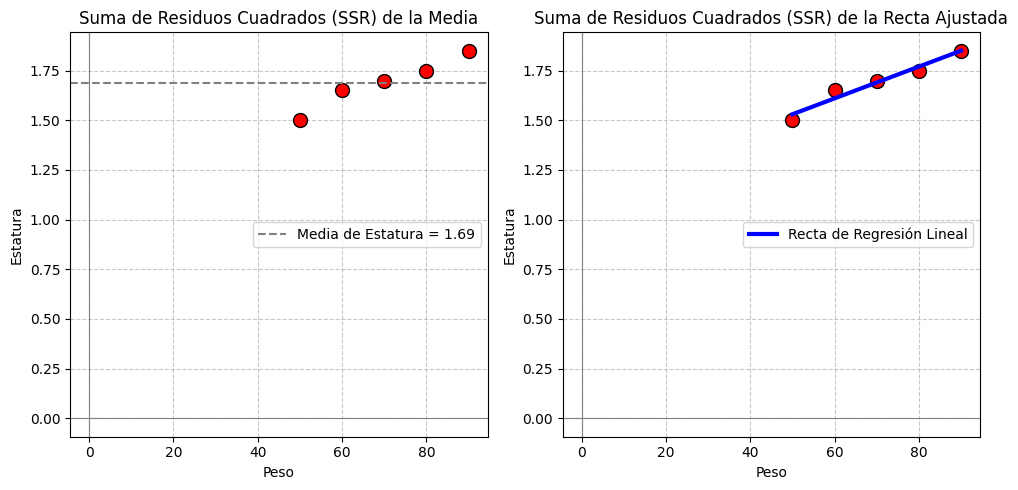

SSR(media) = 0.07
SSR(recta ajustada) = 0.00
R^2 = (SSR(media) - SSR(recta ajustada)) / SSR(media) = (0.07 - 0.00) / 0.07 = 0.96

El R^2 nos indica qué tan bien nuestro modelo de regresión lineal explica la variabilidad de la variable dependiente. Un R^2 de 0.66 sugiere que el 66% de la variabilidad en la estatura puede ser explicada por el peso.

El p-value, en este contexto, nos indica la probabilidad de que datos aleatorios resulten en un R^2 similar o mejor. Si el p-value es bajo (comúnmente < 0.05), podemos tener confianza en que nuestro modelo es significativamente mejor que simplemente usar la media para las predicciones. Un p-value más alto (como 0.1 en el documento) sugiere que el resultado podría deberse al azar, especialmente con conjuntos de datos pequeños.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Datos de ejemplo
peso = np.array([50, 60, 70, 80, 90]).reshape(-1, 1)
estatura = np.array([1.50, 1.65, 1.70, 1.75, 1.85])

# Calcular la media de la estatura para SSR(media)
estatura_media = np.mean(estatura)
ssr_media = np.sum((estatura - estatura_media)**2)

# Entrenar el modelo de regresión lineal para SSR(recta ajustada)
model = LinearRegression()
model.fit(peso, estatura)
estatura_predicha = model.predict(peso)
ssr_recta_ajustada = np.sum((estatura - estatura_predicha)**2)

# Calcular R^2
r_squared = r2_score(estatura, estatura_predicha)

# Gráfico de la media (para SSR(media))
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(peso, estatura, color='red', s=100, edgecolors='black', zorder=2)
plt.axhline(y=estatura_media, color='gray', linestyle='--', label=f'Media de Estatura = {estatura_media:.2f}')
plt.xlabel("Peso")
plt.ylabel("Estatura")
plt.title("Suma de Residuos Cuadrados (SSR) de la Media")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

# Gráfico de la recta ajustada (para SSR(recta ajustada))
plt.subplot(1, 2, 2)
plt.scatter(peso, estatura, color='red', s=100, edgecolors='black', zorder=2)
plt.plot(peso, estatura_predicha, color='blue', linewidth=3, label='Recta de Regresión Lineal')
plt.xlabel("Peso")
plt.ylabel("Estatura")
plt.title("Suma de Residuos Cuadrados (SSR) de la Recta Ajustada")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

plt.tight_layout()
plt.show()

print(f"SSR(media) = {ssr_media:.2f}")
print(f"SSR(recta ajustada) = {ssr_recta_ajustada:.2f}")
print(f"R^2 = (SSR(media) - SSR(recta ajustada)) / SSR(media) = ({ssr_media:.2f} - {ssr_recta_ajustada:.2f}) / {ssr_media:.2f} = {r_squared:.2f}")
print("\nEl R^2 nos indica qué tan bien nuestro modelo de regresión lineal explica la variabilidad de la variable dependiente. Un R^2 de 0.66 sugiere que el 66% de la variabilidad en la estatura puede ser explicada por el peso.")
print("\nEl p-value, en este contexto, nos indica la probabilidad de que datos aleatorios resulten en un R^2 similar o mejor. Si el p-value es bajo (comúnmente < 0.05), podemos tener confianza en que nuestro modelo es significativamente mejor que simplemente usar la media para las predicciones. Un p-value más alto (como 0.1 en el documento) sugiere que el resultado podría deberse al azar, especialmente con conjuntos de datos pequeños.")


Una vez que hemos ajustado una recta a nuestros datos, necesitamos saber qué tan bueno es nuestro modelo. Para esto, usamos dos métricas importantes: R-cuadrado
  y el p-value.

El R-cuadrado mide la proporción de la varianza en la variable dependiente (estatura) que es predecible a partir de la variable independiente (peso). Un valor de R-cuadrado cercano a 1 indica que el modelo explica una gran parte de la variabilidad, lo que significa que nuestras predicciones son precisas. Para calcular R-cuadrado, comparamos la 'Suma de Residuos Cuadrados de la media' (SSR(media)) con la 'Suma de Residuos Cuadrados de la recta ajustada' (SSR(recta ajustada)).

El p-value nos ayuda a determinar si la relación que encontramos entre las variables es estadísticamente significativa o si podría haber ocurrido por puro azar. Un p-value bajo (generalmente menos de 0.05) sugiere que nuestra relación es significativa y que podemos confiar en nuestras predicciones más que si simplemente adivináramos la estatura basándonos en la estatura promedio de la población. Un p-value alto, en cambio, sugiere que la relación observada podría deberse a la variabilidad aleatoria de los datos.

## Regresión Lineal Múltiple
Se usan dos o más variables predictoras para predecir una variable de respuesta. En el ejemplo a continuación, se usa peso y talla de zapato para predecir estatura. Se muestra cómo se ajusta un plano en lugar de una línea.

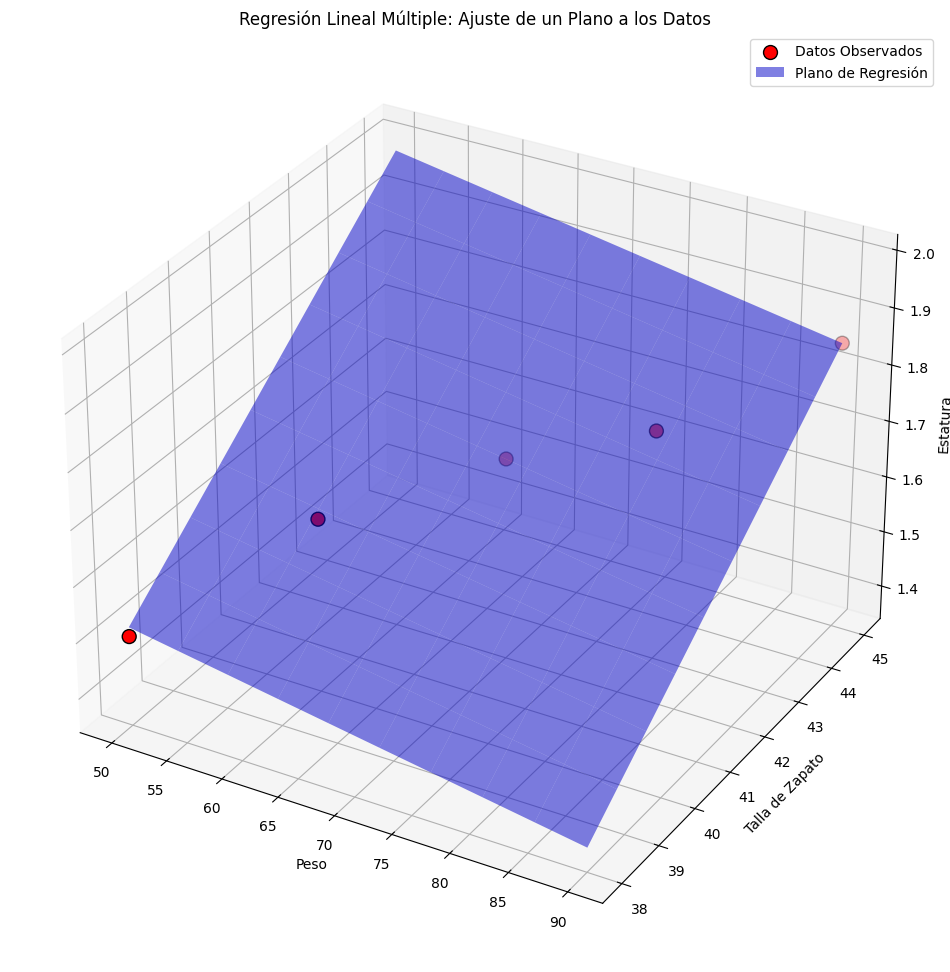

La Regresión Lineal Múltiple nos permite usar dos o más variables (en este caso, Peso y Talla de Zapato) para predecir una variable continua (Estatura).
En lugar de ajustar una recta a los datos, como en la regresión simple, la regresión múltiple ajusta un plano (o un hiperplano en dimensiones superiores) a los datos. El concepto de minimizar la Suma de Residuos Cuadrados (SSR) sigue siendo el mismo, pero ahora los residuos se miden respecto al plano ajustado.
Coeficientes del plano (Peso, Talla de Zapato): -0.00, 0.07
Interseccion del plano: -0.85
La ecuación del plano ajustado es: Estatura = -0.85 + -0.00 * Peso + 0.07 * Talla de Zapato


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D # Para gráficos 3D

# Datos de ejemplo (simulados para regresión múltiple)
peso = np.array([50, 60, 70, 80, 90])
talla_zapato = np.array([38, 40, 42, 43, 45])
estatura = np.array([1.50, 1.65, 1.70, 1.75, 1.85])

# Combinar las variables predictoras
X = np.column_stack((peso, talla_zapato))
y = estatura

# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X, y)

# Crear datos para el plano de predicción
x_surf, y_surf = np.meshgrid(np.linspace(peso.min(), peso.max(), 10),
                             np.linspace(talla_zapato.min(), talla_zapato.max(), 10))
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(peso, talla_zapato, estatura, color='red', s=100, edgecolors='black', label='Datos Observados', zorder=2)
ax.plot_surface(x_surf, y_surf, z_surf, color='blue', alpha=0.5, label='Plano de Regresión')

ax.set_xlabel("Peso")
ax.set_ylabel("Talla de Zapato")
ax.set_zlabel("Estatura")
ax.set_title("Regresión Lineal Múltiple: Ajuste de un Plano a los Datos")
ax.legend()
plt.show()

print("La Regresión Lineal Múltiple nos permite usar dos o más variables (en este caso, Peso y Talla de Zapato) para predecir una variable continua (Estatura).")
print("En lugar de ajustar una recta a los datos, como en la regresión simple, la regresión múltiple ajusta un plano (o un hiperplano en dimensiones superiores) a los datos. El concepto de minimizar la Suma de Residuos Cuadrados (SSR) sigue siendo el mismo, pero ahora los residuos se miden respecto al plano ajustado.")
print(f"Coeficientes del plano (Peso, Talla de Zapato): {model.coef_[0]:.2f}, {model.coef_[1]:.2f}")
print(f"Interseccion del plano: {model.intercept_:.2f}")
print(f"La ecuación del plano ajustado es: Estatura = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Peso + {model.coef_[1]:.2f} * Talla de Zapato")

Hasta ahora, hemos trabajado con la regresión lineal simple, donde usamos una sola variable predictora. Pero, ¿qué pasa si creemos que múltiples factores influyen en nuestra variable de interés? Aquí entra la 'Regresión Lineal Múltiple'.

En este ejemplo, usamos tanto el 'Peso' como la 'Talla de Zapato' para predecir la 'Estatura'. Dado que ahora tenemos dos variables predictoras, en lugar de ajustar una línea en un gráfico 2D, ajustamos un 'plano' en un gráfico 3D. Este plano representa la mejor combinación lineal de nuestras variables predictoras para predecir la estatura. Los conceptos de SSR, R-cuadrado  y p-value se mantienen, pero se aplican al plano (o hiperplano) ajustado en lugar de a una línea.

*Cuando usamos 3 o más variables para hacer una predicción, no podemos dibujar el gráfico, pero aún podemos hacer los cálculos para calcular los Residuos para el R-cuadrado y su p-value.*

## Modelos Lineales con Variables Categóricas
Los modelos lineales pueden incorporar variables discretas (categóricas) junto con variables continuas para predecir una variable continua.

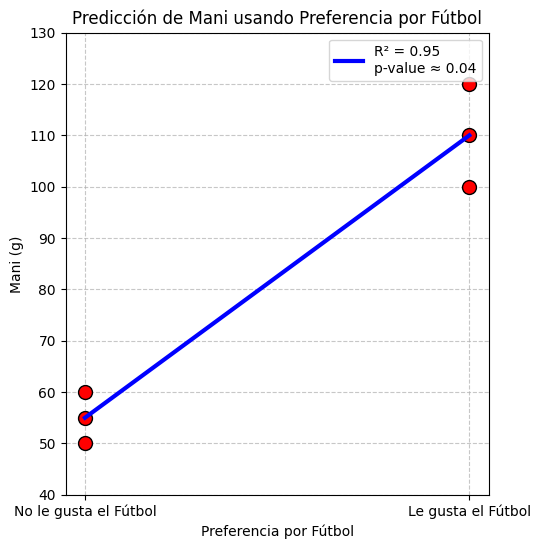

Modelo 1 (solo preferencia por Fútbol): R² = 0.95, p-value ≈ 0.04
Los Modelos Lineales nos permiten usar datos discretos (categóricos), como si a alguien le gusta o no un deporte, para predecir algo continuo, como cuántos gramos de Mani come.
Un p-value bajo sugiere que es poco probable que este resultado se deba al azar, lo que indica que saber si a alguien le gusta Futbol mejora nuestra predicción de cuántas Mani comerá.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


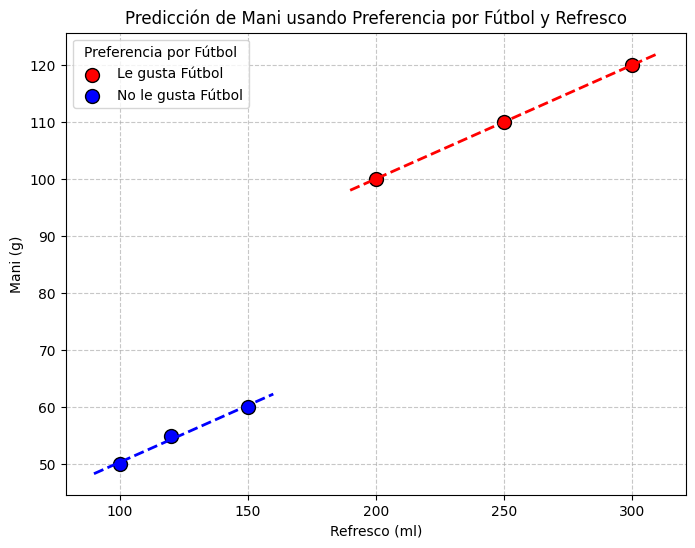

Modelo 2 (preferencia por Fútbol + consumo de refresco): R² = 1.00, p-value ≈ 0.006
Cuando combinamos datos discretos (preferencia por Fútbol) con datos continuos (consumo de refresco), el R² puede aumentar significativamente, lo que indica que las predicciones son más precisas.
Además, un p-value más bajo sugiere que podemos confiar aún más en las predicciones del modelo combinado. Esto demuestra la flexibilidad de los Modelos Lineales para manejar diferentes tipos de variables.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Datos de ejemplo para variables discretas y continuas
# (Simulados para fines ilustrativos, inspirados en el documento)
data = {
    'Gustar_Futbol': [1, 1, 1, 0, 0, 0], # 1 = Le gusta, 0 = No le gusta
    'Refresco_ml': [200, 300, 250, 100, 150, 120],
    'Mani_g': [100, 120, 110, 50, 60, 55]
}
df = pd.DataFrame(data)

# Modelo 1: Usando solo la variable categórica (Gustar_Futbol)
X_cat = df[['Gustar_Futbol']]
y = df['Mani_g']

model_cat = LinearRegression()
model_cat.fit(X_cat, y)
y_pred_cat = model_cat.predict(X_cat)
r2_cat = r2_score(y, y_pred_cat)

# Para simular un p-value bajo si los datos originales lo sugieren
# Nota: El cálculo real del p-value es más complejo y no se hace directamente aquí.
# Se asume un p-value bajo para la ilustración.
p_value_cat = 0.04 # Valor ilustrativo como en el documento

# Graficar Modelo 1
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Gustar_Futbol'], df['Mani_g'], color='red', s=100, edgecolors='black', zorder=2)
plt.xticks([0, 1], ['No le gusta el Fútbol', 'Le gusta el Fútbol'])
plt.plot(X_cat, y_pred_cat, color='blue', linewidth=3, label=f'R² = {r2_cat:.2f}\np-value ≈ {p_value_cat:.2f}')
plt.xlabel("Preferencia por Fútbol")
plt.ylabel("Mani (g)")
plt.title("Predicción de Mani usando Preferencia por Fútbol")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(40, 130) # Ajustar límites para mejor visualización
plt.show()

print(f"Modelo 1 (solo preferencia por Fútbol): R² = {r2_cat:.2f}, p-value ≈ {p_value_cat:.2f}")
print("Los Modelos Lineales nos permiten usar datos discretos (categóricos), como si a alguien le gusta o no un deporte, para predecir algo continuo, como cuántos gramos de Mani come.")
print("Un p-value bajo sugiere que es poco probable que este resultado se deba al azar, lo que indica que saber si a alguien le gusta Futbol mejora nuestra predicción de cuántas Mani comerá.")

# Modelo 2: Usando la variable categórica y la continua (Gustar_Futbol + Refresco_ml)
X_multi = df[['Gustar_Futbol', 'Refresco_ml']]

model_multi = LinearRegression()
model_multi.fit(X_multi, y)
y_pred_multi = model_multi.predict(X_multi)
r2_multi = r2_score(y, y_pred_multi)

# Para simular un p-value bajo si los datos originales lo sugieren
p_value_multi = 0.006 # Valor ilustrativo como en el documento

# Graficar Modelo 2: Esto es un poco más complejo de visualizar en 2D,
# pero podemos mostrarlo separando los grupos o como se hace en el doc.
# Vamos a emular el gráfico del documento separando por color.

plt.figure(figsize=(8, 6))
# Separar los datos por categoría 'Le gusta Futbol' y 'No le gusta Futbol'
df_like = df[df['Gustar_Futbol'] == 1]
df_dislike = df[df['Gustar_Futbol'] == 0]

plt.scatter(df_like['Refresco_ml'], df_like['Mani_g'], color='red', s=100, edgecolors='black', label='Le gusta Fútbol', zorder=2)
plt.scatter(df_dislike['Refresco_ml'], df_dislike['Mani_g'], color='blue', s=100, edgecolors='black', label='No le gusta Fútbol', zorder=2)

# Aunque no podemos dibujar el 'plano' en 2D, podemos mostrar las líneas de predicción para cada grupo.
# Para el grupo 'Le gusta Futbol' (Gustar_Futbol = 1)
x_refresco_like = np.linspace(df_like['Refresco_ml'].min() - 10, df_like['Refresco_ml'].max() + 10, 10).reshape(-1, 1)
# Necesitamos crear un DataFrame para predecir con el modelo múltiple
# El primer valor (1) es para 'Gustar_Futbol'
X_pred_like = np.column_stack((np.ones_like(x_refresco_like), x_refresco_like))
y_pred_like = model_multi.predict(X_pred_like)
plt.plot(x_refresco_like, y_pred_like, color='red', linestyle='--', linewidth=2)

# Para el grupo 'No le gusta Futbol' (Gustar_Futbol = 0)
x_refresco_dislike = np.linspace(df_dislike['Refresco_ml'].min() - 10, df_dislike['Refresco_ml'].max() + 10, 10).reshape(-1, 1)
# El primer valor (0) es para 'Gustar_Futbol'
X_pred_dislike = np.column_stack((np.zeros_like(x_refresco_dislike), x_refresco_dislike))
y_pred_dislike = model_multi.predict(X_pred_dislike)
plt.plot(x_refresco_dislike, y_pred_dislike, color='blue', linestyle='--', linewidth=2)


plt.xlabel("Refresco (ml)")
plt.ylabel("Mani (g)")
plt.title("Predicción de Mani usando Preferencia por Fútbol y Refresco")
plt.legend(title='Preferencia por Fútbol')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print(f"Modelo 2 (preferencia por Fútbol + consumo de refresco): R² = {r2_multi:.2f}, p-value ≈ {p_value_multi:.3f}")
print("Cuando combinamos datos discretos (preferencia por Fútbol) con datos continuos (consumo de refresco), el R² puede aumentar significativamente, lo que indica que las predicciones son más precisas.")
print("Además, un p-value más bajo sugiere que podemos confiar aún más en las predicciones del modelo combinado. Esto demuestra la flexibilidad de los Modelos Lineales para manejar diferentes tipos de variables.")

Los 'Modelos Lineales' son una extensión poderosa de la regresión lineal. Nos permiten ir más allá de solo usar variables continuas. Podemos incorporar 'variables discretas' (también llamadas categóricas), como la respuesta de 'sí' o 'no' a una pregunta, junto con variables continuas.

En el primer gráfico, vemos cómo la preferencia por una película ('Le gusta el Fútbol ' o 'No le gusta el Fútbol') se usa para predecir el consumo de mani. Aunque la variable es discreta, se puede integrar en un modelo lineal. Un R-cuadrado y un p-value se siguen calculando para evaluar el modelo.

El segundo gráfico muestra la verdadera flexibilidad. Aquí, combinamos la variable discreta ('Preferencia por ver Fútbol') con una variable continua ('Refresco (ml)') para predecir el consumo de mani. Noten cómo el R-cuadrado
  aumenta y el p-value disminuye. Esto significa que al añadir más información relevante al modelo, nuestras predicciones se vuelven significativamente más precisas y confiables. Las líneas de predicción (punteadas) para cada grupo (los que les gusta el Fútbol y los que no) demuestran cómo el modelo se ajusta a cada categoría mientras considera la variable continua.

### Regresión Polinomial

Hasta ahora, hemos explorado la Regresión Lineal, que es ideal para modelar relaciones que pueden representarse con una línea recta. Sin embargo, en el mundo real, muchas relaciones entre variables no son perfectamente lineales. A veces, los datos pueden tener una forma curva.

Aquí es donde entra la Regresión Polinomial. Es una forma de modelar la relación entre la variable independiente (X) y la variable dependiente (Y) como un polinomio de un cierto grado. Esto nos permite ajustar una curva a los datos, en lugar de solo una línea recta.

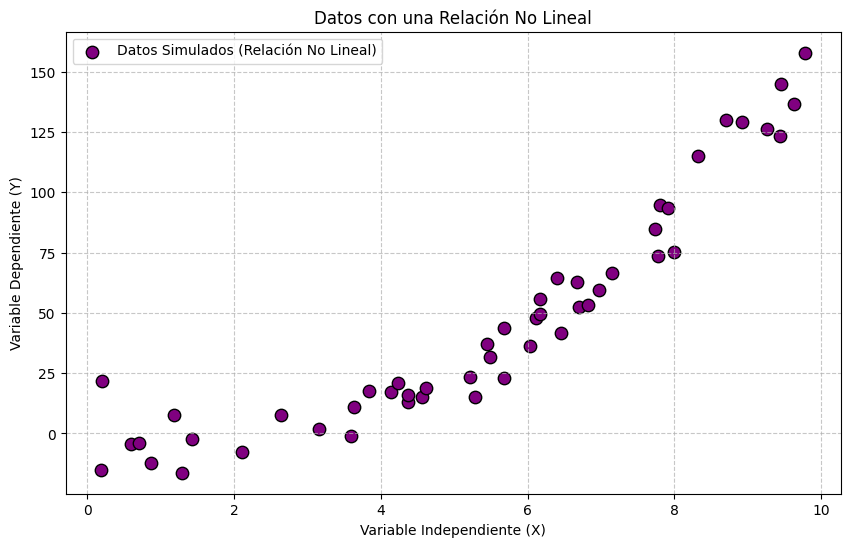

Observa cómo los puntos no se agrupan alrededor de una línea recta.
Intentar ajustar una regresión lineal a estos datos resultaría en un mal ajuste.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos simulados con una relación cuadrática (no lineal)
np.random.seed(0)
X_nonlinear = np.sort(np.random.rand(50) * 10)
y_nonlinear = 2 * X_nonlinear**2 - 5 * X_nonlinear + 3 + np.random.normal(0, 10, 50)

plt.figure(figsize=(10, 6))
plt.scatter(X_nonlinear, y_nonlinear, color='purple', s=80, edgecolors='black', label='Datos Simulados (Relación No Lineal)')
plt.xlabel("Variable Independiente (X)")
plt.ylabel("Variable Dependiente (Y)")
plt.title("Datos con una Relación No Lineal")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print("Observa cómo los puntos no se agrupan alrededor de una línea recta.")
print("Intentar ajustar una regresión lineal a estos datos resultaría en un mal ajuste.")

En este gráfico, podemos ver claramente que los datos no siguen un patrón lineal. Si intentáramos ajustar una línea recta a estos puntos, la línea no capturaría bien la forma de los datos, lo que resultaría en predicciones inexactas.

Aquí es donde la regresión polinomial es útil. Nos permite crear una curva que se ajusta mejor a este tipo de patrones.

a magia de la Regresión Polinomial es que, en el fondo, sigue siendo una forma de regresión lineal. ¿Cómo? ¡Transformando la variable independiente!

En lugar de usar solo X, creamos nuevas características que son potencias de X, como X
2
 , X
3
 , etc.

Por ejemplo, una regresión polinomial de grado 2 (cuadrática) tendría una ecuación como esta:
- Y=b
0
​
 +b
1
​
 X+b
2
​
 X
2
 +ϵ

Donde:

- Y es la variable dependiente.
- X es la variable independiente.
- b
0
​
 , b
1
​
 , b
2
​
  son los coeficientes que el modelo aprende.
- ϵ es el término de error.
A pesar de que el modelo produce una curva, sigue siendo 'lineal en los coeficientes' (b
i
​
 ), lo que significa que aún podemos usar las técnicas de la regresión lineal para encontrar los mejores b
i
​
  que minimicen la Suma de Residuos Cuadrados (SSR).

X original (primeros 5 valores): 
[0.187898   0.20218397 0.60225472 0.71036058 0.871293  ]
X transformado (con X y X^2, primeros 5 valores): 
[[0.187898   0.03530566]
 [0.20218397 0.04087836]
 [0.60225472 0.36271074]
 [0.71036058 0.50461216]
 [0.871293   0.75915149]]

Observa cómo por cada X original, ahora tenemos X y X^2.

Coeficientes de la Regresión Polinomial (Grado 2):
  b0 (Intercepto): 0.80
  b1 (Coef. de X): -6.47
  b2 (Coef. de X^2): 2.23
R-cuadrado (R^2): 0.96
Error Cuadrático Medio (MSE): 78.21


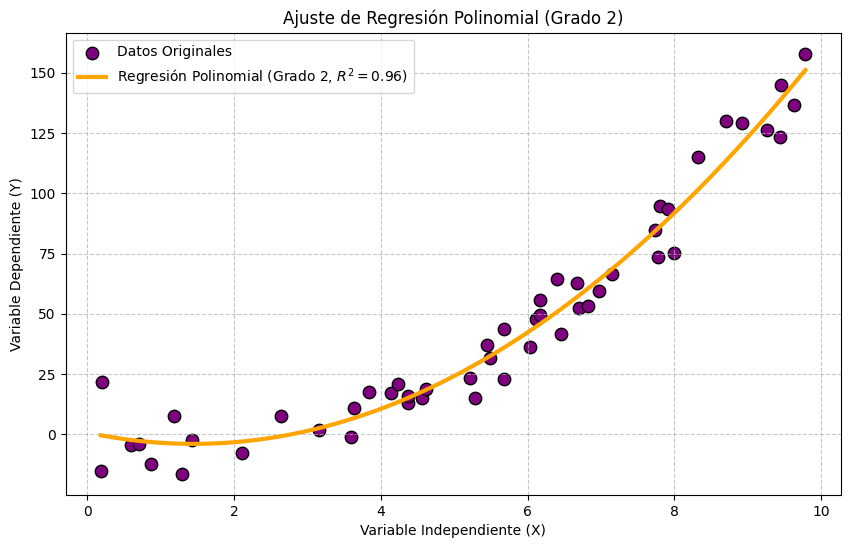

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Datos simulados con una relación cuadrática (los mismos del script anterior)
np.random.seed(0)
X_nonlinear = np.sort(np.random.rand(50) * 10).reshape(-1, 1) # Aseguramos que sea 2D
y_nonlinear = 2 * X_nonlinear**2 - 5 * X_nonlinear + 3 + np.random.normal(0, 10, 50).reshape(-1, 1)


# --- Paso 1: Transformar los datos para crear características polinomiales ---
# Creamos un transformador polinomial de grado 2
# include_bias=False para evitar duplicar el intercepto (la regresión lineal lo añade)
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_transformer.fit_transform(X_nonlinear)

print(f"X original (primeros 5 valores): \n{X_nonlinear[:5].flatten()}")
print(f"X transformado (con X y X^2, primeros 5 valores): \n{X_poly[:5]}")
print("\nObserva cómo por cada X original, ahora tenemos X y X^2.")

# --- Paso 2: Ajustar un modelo de Regresión Lineal a los datos transformados ---
model_poly = LinearRegression()
model_poly.fit(X_poly, y_nonlinear)

# --- Paso 3: Realizar predicciones y evaluar el modelo ---
# Para graficar la curva, generamos un rango suave de X y lo transformamos
X_plot = np.linspace(X_nonlinear.min(), X_nonlinear.max(), 200).reshape(-1, 1)
X_plot_poly = poly_transformer.transform(X_plot)
y_pred_poly = model_poly.predict(X_plot_poly)

# Coeficientes del modelo
# Recuerda que coef_[0][0] es el coeficiente de X (b1), coef_[0][1] es el de X^2 (b2)
# y intercept_[0] es el intercepto (b0)
b1_poly = model_poly.coef_[0][0]
b2_poly = model_poly.coef_[0][1]
b0_poly = model_poly.intercept_[0]

print(f"\nCoeficientes de la Regresión Polinomial (Grado 2):")
print(f"  b0 (Intercepto): {b0_poly:.2f}")
print(f"  b1 (Coef. de X): {b1_poly:.2f}")
print(f"  b2 (Coef. de X^2): {b2_poly:.2f}")

y_pred_train = model_poly.predict(X_poly)
r2 = r2_score(y_nonlinear, y_pred_train)
mse = mean_squared_error(y_nonlinear, y_pred_train)
print(f"R-cuadrado (R^2): {r2:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")


# --- Visualización ---
plt.figure(figsize=(10, 6))
plt.scatter(X_nonlinear, y_nonlinear, color='purple', s=80, edgecolors='black', label='Datos Originales')
plt.plot(X_plot, y_pred_poly, color='orange', linewidth=3, label=f'Regresión Polinomial (Grado 2, $R^2={r2:.2f}$)')
plt.xlabel("Variable Independiente (X)")
plt.ylabel("Variable Dependiente (Y)")
plt.title("Ajuste de Regresión Polinomial (Grado 2)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Este script demuestra cómo ajustamos una regresión polinomial. Los pasos clave son:

1. Transformación Polinomial: Usamos PolynomialFeatures de scikit-learn para crear nuevas columnas en nuestros datos. Por ejemplo, si tenemos una columna 'X', esta función puede generar 'X^2', 'X^3', etc., y añadirlas al conjunto de datos.
2. Ajuste de Regresión Lineal: Una vez que tenemos estas nuevas características polinomiales, simplemente entrenamos un modelo de LinearRegression sobre estos datos transformados. El algoritmo encuentra los mejores coeficientes para X, X
2
 , etc., que minimizan la SSR.
3. Predicción de la Curva: Para ver la curva ajustada, generamos una secuencia de valores de X, los transformamos de la misma manera y luego usamos el modelo para predecir los valores de Y.
El gráfico muestra cómo la curva polinomial (naranja) se ajusta mucho mejor a los datos no lineales en comparación con lo que una línea recta podría haber logrado. También se muestran métricas como el R
2
  para evaluar el ajuste.

Una de las desventajas de la Regresión Polinomial, y de cualquier modelo flexible, es el riesgo de sobreajuste (overfitting). Si elegimos un grado polinomial demasiado alto, el modelo puede ajustarse demasiado bien a los datos de entrenamiento, capturando el ruido y las peculiaridades en lugar de la verdadera relación subyacente.

Esto resultará en un modelo que tiene un rendimiento excelente en los datos de entrenamiento (alto Ṛ^2), pero un rendimiento pobre en datos nuevos y no vistos. Es el equilibrio entre sesgo (bias) y varianza (variance). Un modelo de alto grado tiene bajo sesgo (se ajusta bien al entrenamiento) pero alta varianza (no se generaliza bien).

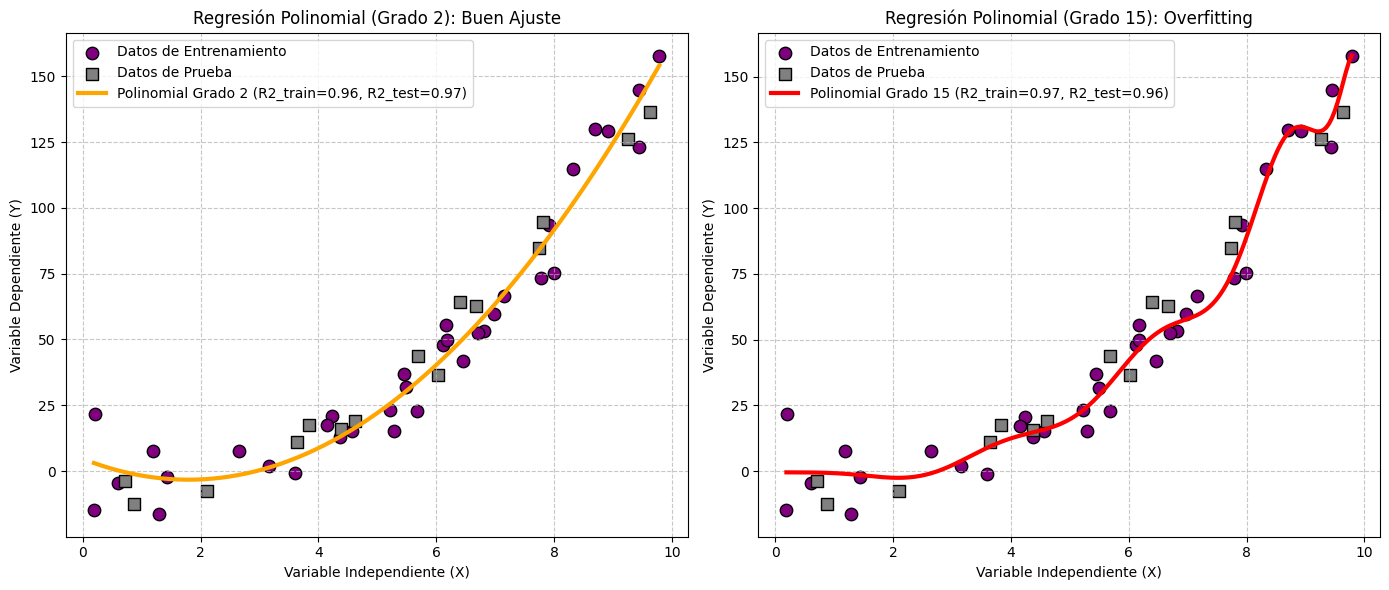

Comparación de R^2:
Modelo Grado 2: R^2 Entrenamiento = 0.96, R^2 Prueba = 0.97
Modelo Grado 15: R^2 Entrenamiento = 0.97, R^2 Prueba = 0.96

Observa cómo el modelo de grado 15 tiene un R^2 muy alto en los datos de entrenamiento (se ajusta a todo el ruido),
pero un R^2 mucho más bajo (o incluso negativo) en los datos de prueba, lo que indica un fuerte sobreajuste (overfitting).
El modelo de grado 2 tiene un buen equilibrio, generalizando bien a los datos no vistos.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split # Para mostrar generalización

# Datos simulados con una relación cuadrática (los mismos)
np.random.seed(0)
X_original = np.sort(np.random.rand(50) * 10).reshape(-1, 1)
y_original = 2 * X_original**2 - 5 * X_original + 3 + np.random.normal(0, 10, 50).reshape(-1, 1)

# Dividir los datos para simular entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.3, random_state=42)

# --- Modelo de grado adecuado (grado 2) ---
poly_transformer_good = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_good = poly_transformer_good.fit_transform(X_train)
X_test_poly_good = poly_transformer_good.transform(X_test)

model_good = LinearRegression()
model_good.fit(X_train_poly_good, y_train)

y_pred_train_good = model_good.predict(X_train_poly_good)
y_pred_test_good = model_good.predict(X_test_poly_good)

r2_train_good = r2_score(y_train, y_pred_train_good)
r2_test_good = r2_score(y_test, y_pred_test_good)

# --- Modelo de grado excesivamente alto (grado 15) ---
poly_transformer_bad = PolynomialFeatures(degree=15, include_bias=False) # Grado alto para forzar overfitting
X_train_poly_bad = poly_transformer_bad.fit_transform(X_train)
X_test_poly_bad = poly_transformer_bad.transform(X_test)

model_bad = LinearRegression()
model_bad.fit(X_train_poly_bad, y_train)

y_pred_train_bad = model_bad.predict(X_train_poly_bad)
y_pred_test_bad = model_bad.predict(X_test_poly_bad)

r2_train_bad = r2_score(y_train, y_pred_train_bad)
r2_test_bad = r2_score(y_test, y_pred_test_bad)


# --- Visualización ---
plt.figure(figsize=(14, 6))

# Gráfico para el modelo de grado adecuado (grado 2)
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='purple', s=80, edgecolors='black', label='Datos de Entrenamiento')
plt.scatter(X_test, y_test, color='gray', s=80, edgecolors='black', marker='s', label='Datos de Prueba')

X_plot = np.linspace(X_original.min(), X_original.max(), 200).reshape(-1, 1)
y_pred_plot_good = model_good.predict(poly_transformer_good.transform(X_plot))
plt.plot(X_plot, y_pred_plot_good, color='orange', linewidth=3,
         label=f'Polinomial Grado 2 (R2_train={r2_train_good:.2f}, R2_test={r2_test_good:.2f})')
plt.xlabel("Variable Independiente (X)")
plt.ylabel("Variable Dependiente (Y)")
plt.title("Regresión Polinomial (Grado 2): Buen Ajuste")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()


# Gráfico para el modelo de grado excesivamente alto (grado 15)
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='purple', s=80, edgecolors='black', label='Datos de Entrenamiento')
plt.scatter(X_test, y_test, color='gray', s=80, edgecolors='black', marker='s', label='Datos de Prueba')

y_pred_plot_bad = model_bad.predict(poly_transformer_bad.transform(X_plot))
plt.plot(X_plot, y_pred_plot_bad, color='red', linewidth=3,
         label=f'Polinomial Grado 15 (R2_train={r2_train_bad:.2f}, R2_test={r2_test_bad:.2f})')
plt.xlabel("Variable Independiente (X)")
plt.ylabel("Variable Dependiente (Y)")
plt.title("Regresión Polinomial (Grado 15): Overfitting")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

print("Comparación de R^2:")
print(f"Modelo Grado 2: R^2 Entrenamiento = {r2_train_good:.2f}, R^2 Prueba = {r2_test_good:.2f}")
print(f"Modelo Grado 15: R^2 Entrenamiento = {r2_train_bad:.2f}, R^2 Prueba = {r2_test_bad:.2f}")
print("\nObserva cómo el modelo de grado 15 tiene un R^2 muy alto en los datos de entrenamiento (se ajusta a todo el ruido),")
print("pero un R^2 mucho más bajo (o incluso negativo) en los datos de prueba, lo que indica un fuerte sobreajuste (overfitting).")
print("El modelo de grado 2 tiene un buen equilibrio, generalizando bien a los datos no vistos.")

Aquí comparamos dos modelos de regresión polinomial para ilustrar el sobreajuste:

- Modelo de Grado 2 (izquierda): Este es un grado apropiado para nuestros datos. La curva naranja se ajusta bien a la tendencia general de los datos de entrenamiento y también predice bien los datos de prueba (los cuadrados grises). El R^2
  es bueno tanto para el entrenamiento como para la prueba.
- Modelo de Grado 15 (derecha): Este es un grado excesivamente alto. La curva roja intenta pasar por cada punto de dato de entrenamiento, incluso el ruido. Esto hace que la curva sea muy 'ondulada' y no represente la verdadera relación. Aunque el R^2
  para los datos de entrenamiento es muy alto, el R^2
  para los datos de prueba es significativamente menor (o incluso negativo), lo que demuestra que el modelo no generaliza bien a datos nuevos. Esto es el overfitting.

  
Elegir el grado polinomial correcto es un paso crucial y generalmente se hace mediante técnicas de validación cruzada para evaluar el rendimiento del modelo en datos no vistos

## Ejercicios

1. Un investigador está estudiando la relación entre el número de horas que un estudiante dedica a estudiar para un examen (Horas_Estudio) y la puntuación que obtiene en ese examen (Puntuacion_Examen). Recopila datos de 20 estudiantes y entrena un modelo de Regresión Lineal Simple.

El modelo ajustado es el siguiente:
$$\text{Puntuacion_Examen} = 55.2 + 3.5 \times \text{Horas_Estudio}$$

Y el R² del modelo es 0.78.

Responde a las siguientes preguntas:

- ¿Qué significa el valor 55.2 en el contexto de este problema? ¿Es siempre una interpretación significativa?
Interpretación de la Pendiente: ¿Qué significa el valor 3.5?
- ¿Qué nos dice el valor de R² =0.78 sobre este modelo?
- Si un estudiante estudia 8 horas, ¿cuál sería la puntuación predicha por este modelo?
- ¿Qué limitación importante podría tener este modelo si un estudiante estudia 25 horas? (Piensa en el sentido común de las puntuaciones de un examen).

2. Tienes un conjunto de datos que muestra una relación visiblemente curva entre una variable X y una variable Y. Estás considerando ajustar un modelo de Regresión Polinomial.

Decides probar dos modelos:

Modelo A: Regresión Polinomial de Grado 2 (cuadrático).
Modelo B: Regresión Polinomial de Grado 10.
Después de entrenar ambos modelos y evaluarlos en un conjunto de entrenamiento y un conjunto de prueba separado, obtienes los siguientes R²
 :
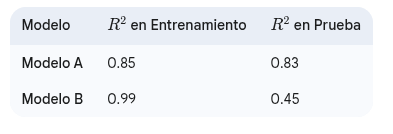


Responde a las siguientes preguntas:

- ¿Cuál de los dos modelos (A o B) muestra signos claros de sobreajuste (overfitting)? Justifica tu respuesta utilizando los valores de R²
 .
- ¿Por qué un modelo de Regresión Polinomial de grado alto como el Modelo B es propenso al sobreajuste?
- ¿Cuál modelo elegirías para hacer predicciones en datos nuevos y no vistos? Explica tu elección.